In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.columns = ["Index", "Sex", "Age", "Annual_income", "Spending_score"]
data

,Index,Sex,Age,Annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
### data distribution and descriptive stats ####
data.info() # no null vals 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           200 non-null    int64 
 1   Sex             200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,Index,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
data = data.drop(columns=["Index"], axis = 1)


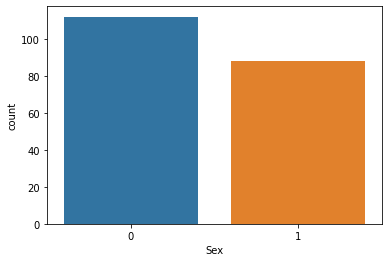

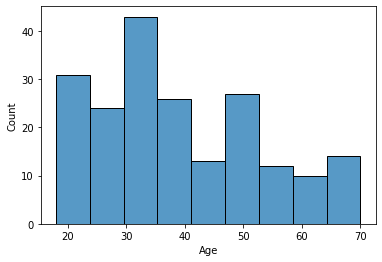

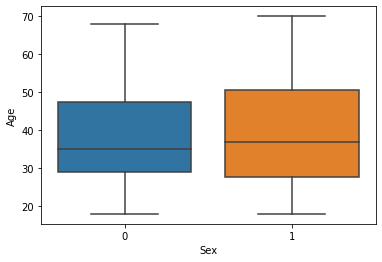

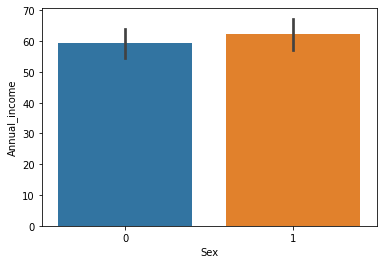

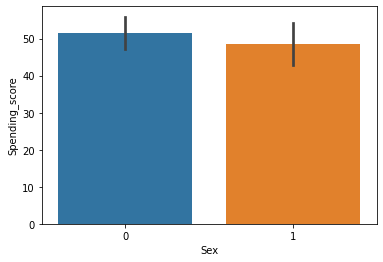

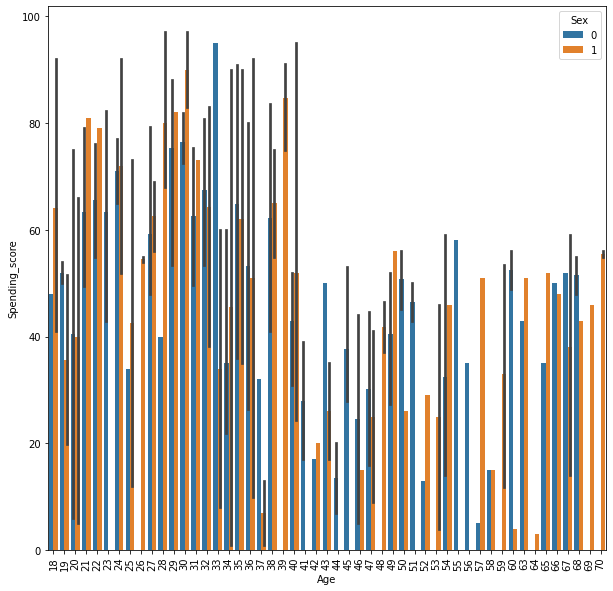

In [59]:
### distribution ### 

sns.countplot(data = data, x = "Sex" )
plt.show()
sns.histplot(data = data, x = "Age")
plt.show()
sns.boxplot(data = data, x = "Sex", y="Age" )
plt.show()
sns.barplot(data = data, x = "Sex", y="Annual_income")
plt.show()
#### Sex ==> Spending score #### 
sns.barplot(data = data, x = "Sex", y = "Spending_score")
plt.show()
### Spending score ==> per ages  ####
plt.figure(figsize=(10, 10)) 
sns.barplot(data = data, x = "Age", y = "Spending_score", hue = "Sex")
plt.xticks(rotation = 90)
plt.show()

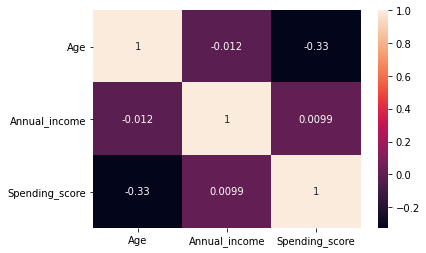

In [32]:
### correlation ### 

sns.heatmap(data = data.corr(),  annot = True )

In [33]:
### label encoding ### 
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data

,Sex,Age,Annual_income,Spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [36]:
### split data (train ==> test): 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
#X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 3)

kmeans = KMeans(n_clusters = 4) # 4 groups 
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

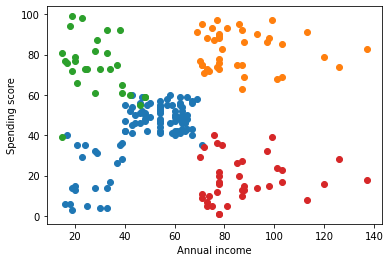

Pripada grupi ===> 
0
Score of KMeans:  104422.8349853975
Silhoulete index:  0.40553486600451777


In [63]:
## visualise solutions:
#kmeans.labels_
Labels = kmeans.labels_
plt.xlabel("Annual income")
plt.ylabel("Spending score") 
for i in range(0, 4):
  plt.scatter(data[ Labels == i   ]["Annual_income"], data[ Labels == i   ]["Spending_score"] )

plt.show()

dataSingle = data[(data[  "Annual_income"] == 16 )  & ( data[ "Spending_score" ] == 6) ]
index = dataSingle.index[0] #.iloc[ 9 , 0] 
print("Pripada grupi ===> ")
print(Labels[ index ])
### dobrota klasterovanja:
print("Score of KMeans: ", kmeans.inertia_)
from sklearn.metrics import silhouette_score
print("Silhoulete index: ", silhouette_score(data, kmeans.labels_ ))# 0.41 (index)
